## Table of Contents
<ul>
    <li>01. Importing libraries</li>
    <li>02. Importing data</li>
    <li>03. Calculating Order Values</li>
    <li>04. Analysis</li>
    <li>05. Exporting data</li>
</ul>

## 01. Importing libararies

In [75]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Importing data

In [11]:
path  = r'C:\Users\No-Admin\Dropbox (GSC)\CareerFoundry\Exercises\Achievement 4\Instacart Basket Analysis' #Important: No \ at the end!

In [13]:
df_all_orders_profiles_dept = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'all_orders_profiles_dept.pkl'))

In [17]:
df_all_orders_profiles_dept.head()

,department,department_id,user_id,gender,state,age,date_joined,dependants,fam_status,income,...,max_order,loyalty_flag,mean_prices,spender,median_order,freq_cust,region,activity,customer_profile,_merge
0,frozen,1,33890,Female,New Mexico,36,1/1/2017,0,single,59285,...,12,Regular customer,7.057534,Low Spender,26.0,Non-frequent customer,West,Active customer,Single,both
1,frozen,1,65803,Male,Idaho,35,1/1/2017,2,married,99568,...,9,New customer,8.375961,Low Spender,7.0,Frequent customer,West,Active customer,NaN,both
2,frozen,1,65803,Male,Idaho,35,1/1/2017,2,married,99568,...,9,New customer,8.375961,Low Spender,7.0,Frequent customer,West,Active customer,NaN,both
3,frozen,1,65803,Male,Idaho,35,1/1/2017,2,married,99568,...,9,New customer,8.375961,Low Spender,7.0,Frequent customer,West,Active customer,NaN,both
4,frozen,1,65803,Male,Idaho,35,1/1/2017,2,married,99568,...,9,New customer,8.375961,Low Spender,7.0,Frequent customer,West,Active customer,NaN,both


In [19]:
df_all_orders_profiles_dept.columns

Index(['department', 'department_id', 'user_id', 'gender', 'state', 'age',
       'date_joined', 'dependants', 'fam_status', 'income', 'product_id',
       'product_name', 'prices', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_last_order',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_prices', 'spender', 'median_order', 'freq_cust', 'region',
       'activity', 'customer_profile', '_merge'],
      dtype='object')

Reducing file size by dropping unneccessary columns

In [21]:
df_all_orders_profiles_dept.drop(columns = ['_merge', 'date_joined', 'busiest_days', 'mean_prices', 'spender', 'customer_profile'])

,department,department_id,user_id,gender,state,age,dependants,fam_status,income,product_id,...,orders_day_of_week,order_hour_of_day,days_since_last_order,busiest_period_of_day,max_order,loyalty_flag,median_order,freq_cust,region,activity
0,frozen,1,33890,Female,New Mexico,36,0,single,59285,21785,...,6,14,21.0,Regularly busy,12,Regular customer,26.0,Non-frequent customer,West,Active customer
1,frozen,1,65803,Male,Idaho,35,2,married,99568,4428,...,1,13,3.0,Regularly busy,9,New customer,7.0,Frequent customer,West,Active customer
2,frozen,1,65803,Male,Idaho,35,2,married,99568,12324,...,1,12,7.0,Regularly busy,9,New customer,7.0,Frequent customer,West,Active customer
3,frozen,1,65803,Male,Idaho,35,2,married,99568,13031,...,1,12,7.0,Regularly busy,9,New customer,7.0,Frequent customer,West,Active customer
4,frozen,1,65803,Male,Idaho,35,2,married,99568,48073,...,1,13,3.0,Regularly busy,9,New customer,7.0,Frequent customer,West,Active customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24414872,missing,21,205754,Female,Maine,79,3,married,105351,30563,...,1,10,7.0,Most orders,50,Loyal customer,7.0,Frequent customer,Northeast,Active customer
24414873,missing,21,37710,Female,Montana,41,0,single,113192,11286,...,1,12,5.0,Regularly busy,8,New customer,14.0,Regular customer,West,Active customer
24414874,missing,21,56206,Male,Arkansas,51,3,married,130993,27767,...,5,22,30.0,Regularly busy,12,Regular customer,30.0,Non-frequent customer,South,Active customer
24414875,missing,21,129762,Male,Kentucky,47,0,single,112836,40362,...,4,16,7.0,Regularly busy,14,Regular customer,7.0,Frequent customer,South,Active customer


In [23]:
df_orders = df_all_orders_profiles_dept.drop(columns = ['_merge', 'date_joined', 'busiest_days', 'mean_prices', 'spender', 'customer_profile'])

In [25]:
df_orders.columns

Index(['department', 'department_id', 'user_id', 'gender', 'state', 'age',
       'dependants', 'fam_status', 'income', 'product_id', 'product_name',
       'prices', 'order_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'median_order', 'freq_cust', 'region',
       'activity'],
      dtype='object')

In [30]:
df_orders.head()

,department,department_id,user_id,gender,state,age,dependants,fam_status,income,product_id,...,orders_day_of_week,order_hour_of_day,days_since_last_order,busiest_period_of_day,max_order,loyalty_flag,median_order,freq_cust,region,activity
0,frozen,1,33890,Female,New Mexico,36,0,single,59285,21785,...,6,14,21.0,Regularly busy,12,Regular customer,26.0,Non-frequent customer,West,Active customer
1,frozen,1,65803,Male,Idaho,35,2,married,99568,4428,...,1,13,3.0,Regularly busy,9,New customer,7.0,Frequent customer,West,Active customer
2,frozen,1,65803,Male,Idaho,35,2,married,99568,12324,...,1,12,7.0,Regularly busy,9,New customer,7.0,Frequent customer,West,Active customer
3,frozen,1,65803,Male,Idaho,35,2,married,99568,13031,...,1,12,7.0,Regularly busy,9,New customer,7.0,Frequent customer,West,Active customer
4,frozen,1,65803,Male,Idaho,35,2,married,99568,48073,...,1,13,3.0,Regularly busy,9,New customer,7.0,Frequent customer,West,Active customer


In [32]:
#Creating frequency table for department to see how many missing values
df_orders['department'].value_counts(dropna = False)

department
produce            7227091
dairy eggs         4120488
snacks             2187121
beverages          2036447
frozen             1627614
pantry             1385375
bakery              883330
canned goods        787790
deli                783011
dry goods pasta     633725
household           539349
breakfast           524945
meat seafood        523890
babies              335947
personal care       328480
international       197900
alcohol             107972
pets                 72111
missing              57567
bulk                 27558
other                27166
Name: count, dtype: int64

In [34]:
#Cecking whether "missing" is a category or NaN
df_orders['department_id'].value_counts(dropna = False)

department_id
4     7227091
16    4120488
19    2187121
7     2036447
1     1627614
13    1385375
3      883330
15     787790
20     783011
9      633725
17     539349
14     524945
12     523890
18     335947
11     328480
6      197900
5      107972
8       72111
21      57567
10      27558
2       27166
Name: count, dtype: int64

Result: "Missing" is department_id 21 and thus not NaN

In [37]:
df_orders.dtypes

department                object
department_id               int8
user_id                    int32
gender                    object
state                     object
age                         int8
dependants                  int8
fam_status                object
income                     int32
product_id                 int32
product_name              object
prices                   float32
order_id                   int32
order_number                int8
orders_day_of_week          int8
order_hour_of_day           int8
days_since_last_order    float16
busiest_period_of_day     object
max_order                   int8
loyalty_flag              object
median_order             float32
freq_cust                 object
region                    object
activity                  object
dtype: object

In [39]:
df_orders.describe()

C:\Users\No-Admin\anaconda3\Lib\site-packages\pandas\core\nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\No-Admin\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\No-Admin\anaconda3\Lib\site-packages\pandas\core\nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
C:\Users\No-Admin\anaconda3\Lib\site-packages\pandas\core\nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)


,department_id,user_id,age,dependants,income,product_id,prices,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,max_order,median_order
count,2.441488e+07,2.441488e+07,2.441488e+07,2.441488e+07,2.441488e+07,2.441488e+07,2.441488e+07,2.441488e+07,2.441488e+07,2.441488e+07,2.441488e+07,24414877.0,2.441488e+07,2.441488e+07
mean,9.929307e+00,1.029125e+05,4.945734e+01,1.502001e+00,9.989505e+04,2.559043e+04,9.743826e+00,1.710460e+06,2.194990e+01,2.747950e+00,1.336244e+01,NaN,3.848836e+01,8.952001e+00
std,6.282674e+00,5.946726e+04,1.848532e+01,1.119171e+00,4.333357e+04,1.407628e+04,1.705663e+02,9.872710e+05,1.771938e+01,2.084170e+00,4.247337e+00,0.0,2.502275e+01,5.723518e+00
min,1.000000e+00,1.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04,1.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.0,5.000000e+00,0.000000e+00
25%,4.000000e+00,5.138000e+04,3.300000e+01,0.000000e+00,6.752400e+04,1.353500e+04,4.200000e+00,8.562140e+05,9.000000e+00,1.000000e+00,1.000000e+01,4.0,1.800000e+01,5.000000e+00
50%,9.000000e+00,1.025290e+05,4.900000e+01,2.000000e+00,9.683600e+04,2.523200e+04,7.400000e+00,1.710492e+06,1.600000e+01,3.000000e+00,1.300000e+01,7.0,3.300000e+01,7.000000e+00
75%,1.600000e+01,1.543370e+05,6.500000e+01,3.000000e+00,1.281600e+05,3.793500e+04,1.130000e+01,2.565431e+06,2.900000e+01,5.000000e+00,1.600000e+01,13.0,5.200000e+01,1.100000e+01
max,2.100000e+01,2.062090e+05,8.100000e+01,3.000000e+00,5.939010e+05,4.968800e+04,1.490000e+04,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,30.0,9.900000e+01,3.000000e+01


## 03. Calculating Order Values

In [41]:
#Create variable order_value summing up all prices for all orders
order_value = df_orders.groupby('order_id')['prices'].sum().reset_index()

In [43]:
order_value

,order_id,prices
0,3,70.300003
1,4,92.800003
2,5,210.699997
3,7,12.700000
4,8,2.400000
...,...,...
2413881,3421076,73.500000
2413882,3421078,73.900002
2413883,3421079,1.600000
2413884,3421082,56.400002


In [47]:
# Rename the price column to indicate that this is total order value
order_value.rename(columns={'prices': 'total_order_value'}, inplace=True)

In [49]:
order_value

,order_id,total_order_value
0,3,70.300003
1,4,92.800003
2,5,210.699997
3,7,12.700000
4,8,2.400000
...,...,...
2413881,3421076,73.500000
2413882,3421078,73.900002
2413883,3421079,1.600000
2413884,3421082,56.400002


In [60]:
# Merge the total order values back with for new df
df_order_values = pd.merge(df_orders, order_value, on='order_id', how='left')

## 04. Analysis

In [65]:
df_order_values.groupby('order_id')

In [69]:
#Calculating the mean order value based on region
df_order_values.groupby('region').agg({'total_order_value': ['mean']})

,total_order_value
,mean
region,
Midwest,155.140503
Northeast,149.797119
South,153.253082
West,152.535767


In [73]:
#Calculating the mean order value based on region
df_order_values.groupby('fam_status').agg({'total_order_value': ['mean']})

,total_order_value
,mean
fam_status,
divorced/widowed,154.550552
living with parents and siblings,146.652466
married,154.265518
single,148.035538


In [81]:
#Look at fam_status across regions
crosstab = pd.crosstab(df_order_values['fam_status'], df_order_values['region'])

In [83]:
crosstab

region,Midwest,Northeast,South,West
fam_status,,,,
divorced/widowed,485162,380360,693442,530248
living with parents and siblings,275980,204931,399221,291267
married,3998815,3045202,5691531,4402928
single,951799,684778,1344892,1034321


<Axes: xlabel='total_order_value', ylabel='total_order_value'>

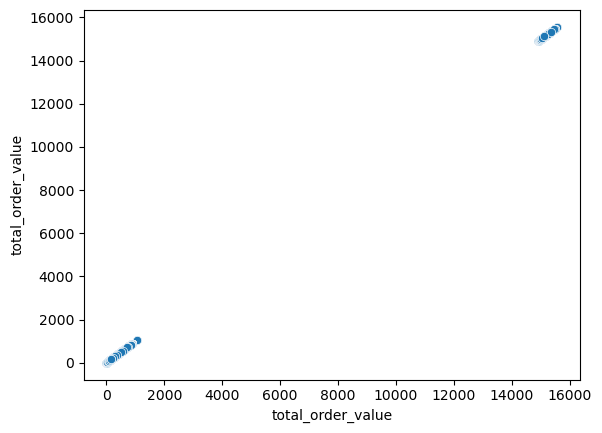

In [87]:
#Scatterplot to show distribution of order values
sns.scatterplot(x = 'total_order_value', y = 'total_order_value',data = df_order_values)

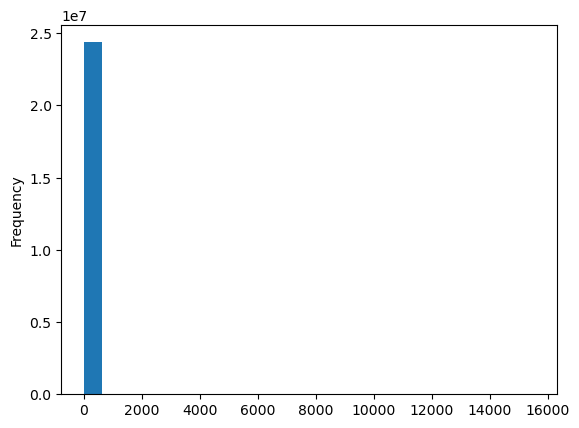

In [89]:
#Creating a histogram
hist_order_value = df_order_values['total_order_value'].plot.hist(bins = 25)

In [107]:
#Creating a subset of very high orders
high_orders = df_order_values[(df_order_values['total_order_value']>14899)]

In [109]:
high_orders

,department,department_id,user_id,gender,state,age,dependants,fam_status,income,product_id,...,order_hour_of_day,days_since_last_order,busiest_period_of_day,max_order,loyalty_flag,median_order,freq_cust,region,activity,total_order_value
275,frozen,1,117740,Female,Oregon,55,1,married,292759,6052,...,10,14.0,Most orders,84,Loyal customer,4.0,Frequent customer,West,Active customer,15016.599609
286,frozen,1,117740,Female,Oregon,55,1,married,292759,25745,...,10,14.0,Most orders,84,Loyal customer,4.0,Frequent customer,West,Active customer,15016.599609
473,frozen,1,31590,Female,Montana,46,0,single,154076,14913,...,8,12.0,Regularly busy,38,Regular customer,8.0,Frequent customer,West,Active customer,14958.400391
474,frozen,1,31590,Female,Montana,46,0,single,154076,16608,...,8,12.0,Regularly busy,38,Regular customer,8.0,Frequent customer,West,Active customer,14958.400391
484,frozen,1,31590,Female,Montana,46,0,single,154076,23360,...,8,12.0,Regularly busy,38,Regular customer,8.0,Frequent customer,West,Active customer,14958.400391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24410176,missing,21,42033,Male,District of Columbia,38,3,married,153507,36860,...,10,12.0,Most orders,53,Loyal customer,7.0,Frequent customer,South,Active customer,15336.600586
24412467,missing,21,58038,Male,Wyoming,44,1,married,217337,12058,...,13,9.0,Regularly busy,58,Loyal customer,6.0,Frequent customer,West,Active customer,14997.600586
24413850,missing,21,124248,Male,Hawaii,30,0,single,185063,32644,...,12,16.0,Regularly busy,19,Regular customer,16.0,Regular customer,West,Active customer,15022.799805
24413852,missing,21,124248,Male,Hawaii,30,0,single,185063,47307,...,12,16.0,Regularly busy,19,Regular customer,16.0,Regular customer,West,Active customer,15022.799805


In [111]:
high_orders.describe()

C:\Users\No-Admin\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,department_id,user_id,age,dependants,income,product_id,prices,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,max_order,median_order,total_order_value
count,49954.000000,49954.000000,49954.000000,49954.000000,49954.000000,49954.000000,49954.000000,4.995400e+04,49954.000000,49954.000000,49954.000000,4.995400e+04,49954.000000,49954.000000,49954.000000
mean,10.642751,105252.590603,49.634864,1.575109,232506.073868,25003.415823,962.345276,1.693323e+06,19.807463,2.731873,13.306622,inf,35.589602,9.961325,15057.442383
std,6.203327,59340.077122,18.701259,1.115214,111794.628655,13950.636752,3647.640869,9.785909e+05,16.476757,2.004433,4.185321,8.703125e+00,25.091581,6.280719,93.486931
min,1.000000,17.000000,18.000000,0.000000,59081.000000,4.000000,1.000000,4.300000e+01,5.000000,0.000000,0.000000,0.000000e+00,5.000000,1.000000,14900.000000
25%,4.000000,58136.000000,33.000000,1.000000,149343.000000,13755.000000,4.400000,8.526200e+05,8.000000,1.000000,10.000000,5.000000e+00,16.000000,6.000000,14990.500000
50%,13.000000,103578.000000,49.000000,2.000000,207493.000000,23957.000000,7.800000,1.671367e+06,14.000000,3.000000,13.000000,8.000000e+00,29.000000,8.000000,15038.299805
75%,16.000000,158267.000000,65.000000,3.000000,284968.000000,36664.000000,12.100000,2.559158e+06,26.000000,5.000000,16.000000,1.600000e+01,48.000000,12.000000,15107.000000
max,21.000000,205818.000000,81.000000,3.000000,593901.000000,49683.000000,14900.000000,3.420676e+06,99.000000,6.000000,23.000000,3.000000e+01,99.000000,30.000000,15561.700195


In [113]:
#Creating a subset of very high prices
high_prices = df_order_values[(df_order_values['prices']>14899)]

In [115]:
high_prices

,department,department_id,user_id,gender,state,age,dependants,fam_status,income,product_id,...,order_hour_of_day,days_since_last_order,busiest_period_of_day,max_order,loyalty_flag,median_order,freq_cust,region,activity,total_order_value
16392037,dairy eggs,16,117740,Female,Oregon,55,1,married,292759,21553,...,10,14.0,Most orders,84,Loyal customer,4.0,Frequent customer,West,Active customer,15016.599609
16392656,dairy eggs,16,31590,Female,Montana,46,0,single,154076,21553,...,8,12.0,Regularly busy,38,Regular customer,8.0,Frequent customer,West,Active customer,14958.400391
16398169,dairy eggs,16,58136,Male,Virginia,23,0,single,108451,21553,...,16,8.0,Regularly busy,43,Loyal customer,8.0,Frequent customer,South,Active customer,15074.900391
16398170,dairy eggs,16,58136,Male,Virginia,23,0,single,108451,21553,...,11,9.0,Regularly busy,43,Loyal customer,8.0,Frequent customer,South,Active customer,15095.900391
16398171,dairy eggs,16,58136,Male,Virginia,23,0,single,108451,21553,...,19,18.0,Regularly busy,43,Loyal customer,8.0,Frequent customer,South,Active customer,15069.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20510026,dairy eggs,16,5519,Female,Georgia,78,3,married,262610,21553,...,8,7.0,Regularly busy,53,Loyal customer,7.0,Frequent customer,South,Active customer,15045.700195
20510027,dairy eggs,16,5519,Female,Georgia,78,3,married,262610,21553,...,16,5.0,Regularly busy,53,Loyal customer,7.0,Frequent customer,South,Active customer,15061.799805
20510028,dairy eggs,16,5519,Female,Georgia,78,3,married,262610,21553,...,8,4.0,Regularly busy,53,Loyal customer,7.0,Frequent customer,South,Active customer,15077.400391
20510029,dairy eggs,16,5519,Female,Georgia,78,3,married,262610,21553,...,9,7.0,Regularly busy,53,Loyal customer,7.0,Frequent customer,South,Active customer,15113.900391


In [117]:
#Change price of 14900 to NaN
df_order_values.loc[df_order_values['prices'] >10000, 'prices'] = np.nan

In [119]:
df_order_values['prices'].max()

25.0

**Realization**: I have to recalculate total_order_value since I removed the excessive prices.

In [136]:
#Create variable order_value_2 summing up all prices for all orders
order_value_2 = df_order_values.groupby('order_id')['prices'].sum().reset_index()

In [138]:
order_value_2.describe()

,order_id,prices
count,2.413886e+06,2.413886e+06
mean,1.710647e+06,7.878756e+01
std,9.876097e+05,6.012331e+01
min,3.000000e+00,0.000000e+00
25%,8.556565e+05,3.480000e+01
50%,1.710912e+06,6.435000e+01
75%,2.565912e+06,1.074000e+02
max,3.421083e+06,1.047400e+03


That looks better. The max order is now at 1047 USD.

In [141]:
# Rename the prices column to indicate that this is total order value
order_value_2.rename(columns={'prices': 'total_order_value'}, inplace=True)

In [143]:
# Merge the total order values back with for new df
df_order_values = pd.merge(df_order_values, order_value_2, on='order_id', how='left')

In [145]:
df_order_values['prices'].max()

C:\Users\No-Admin\anaconda3\Lib\site-packages\pandas\core\nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\No-Admin\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\No-Admin\anaconda3\Lib\site-packages\pandas\core\nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
C:\Users\No-Admin\anaconda3\Lib\site-packages\pandas\core\nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)


,department_id,user_id,age,dependants,income,product_id,prices,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,max_order,median_order,total_order_value_x,total_order_value_y
count,2.441488e+07,2.441488e+07,2.441488e+07,2.441488e+07,2.441488e+07,2.441488e+07,2.441168e+07,2.441488e+07,2.441488e+07,2.441488e+07,2.441488e+07,24414877.0,2.441488e+07,2.441488e+07,2.441488e+07,2.441488e+07
mean,9.929307e+00,1.029125e+05,4.945734e+01,1.502001e+00,9.989505e+04,2.559043e+04,7.790705e+00,1.710460e+06,2.194990e+01,2.747950e+00,1.336244e+01,NaN,3.848836e+01,8.952001e+00,1.529000e+02,1.224137e+02
std,6.282674e+00,5.946726e+04,1.848532e+01,1.119171e+00,4.333357e+04,1.407628e+04,4.149102e+00,9.872710e+05,1.771938e+01,2.084170e+00,4.247337e+00,0.0,2.502275e+01,5.723518e+00,6.748634e+02,7.399281e+01
min,1.000000e+00,1.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04,1.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.0,5.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,4.000000e+00,5.138000e+04,3.300000e+01,0.000000e+00,6.752400e+04,1.353500e+04,4.200000e+00,8.562140e+05,9.000000e+00,1.000000e+00,1.000000e+01,4.0,1.800000e+01,5.000000e+00,6.680000e+01,6.680000e+01
50%,9.000000e+00,1.025290e+05,4.900000e+01,2.000000e+00,9.683600e+04,2.523200e+04,7.400000e+00,1.710492e+06,1.600000e+01,3.000000e+00,1.300000e+01,7.0,3.300000e+01,7.000000e+00,1.079000e+02,1.077000e+02
75%,1.600000e+01,1.543370e+05,6.500000e+01,3.000000e+00,1.281600e+05,3.793500e+04,1.120000e+01,2.565431e+06,2.900000e+01,5.000000e+00,1.600000e+01,13.0,5.200000e+01,1.100000e+01,1.626000e+02,1.623000e+02
max,2.100000e+01,2.062090e+05,8.100000e+01,3.000000e+00,5.939010e+05,4.968800e+04,2.500000e+01,3.421083e+06,9.900000e+01,6.000000e+00,2.300000e+01,30.0,9.900000e+01,3.000000e+01,1.556170e+04,1.047400e+03


Now we have a mess. Removing total_order_value_x and y

In [148]:
df_order_values = df_order_values.drop(columns = ['total_order_value_x', 'total_order_value_y'])

In [150]:
order_value_2

,order_id,total_order_value
0,3,70.300003
1,4,92.800003
2,5,210.699997
3,7,12.700000
4,8,2.400000
...,...,...
2413881,3421076,73.500000
2413882,3421078,73.900002
2413883,3421079,1.600000
2413884,3421082,56.400002


In [152]:
# Trying merge again
df_order_values = pd.merge(df_order_values, order_value_2, on='order_id', how='left')

In [154]:
df_order_values['total_order_value'].max()

1047.4000244140625

In [156]:
df_order_values.columns

Index(['department', 'department_id', 'user_id', 'gender', 'state', 'age',
       'dependants', 'fam_status', 'income', 'product_id', 'product_name',
       'prices', 'order_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'median_order', 'freq_cust', 'region',
       'activity', 'total_order_value'],
      dtype='object')

Retrying histogram and scatterplot

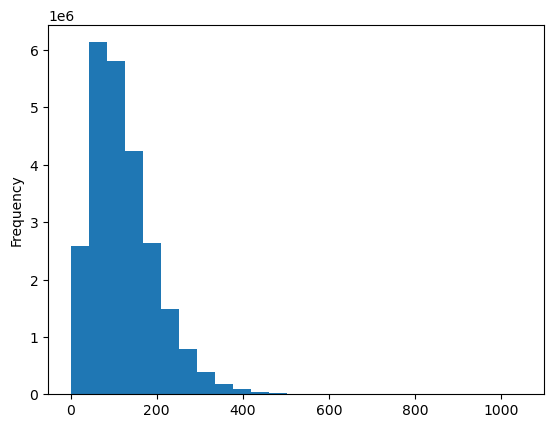

In [159]:
#Creating a histogram
hist_order_value = df_order_values['total_order_value'].plot.hist(bins = 25)

<Axes: xlabel='total_order_value', ylabel='total_order_value'>

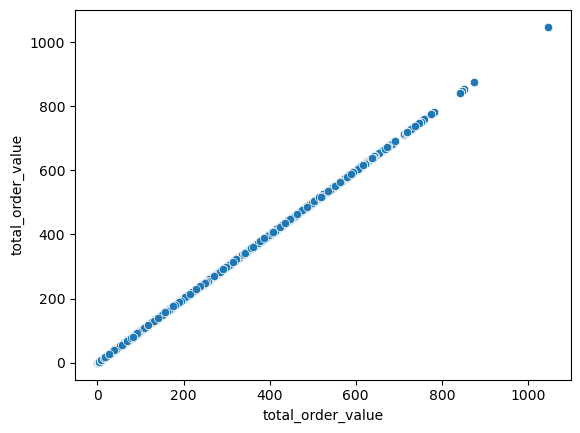

In [163]:
#Scatterplot to show distribution of order values
sns.scatterplot(x = 'total_order_value', y = 'total_order_value',data = df_order_values)

In [164]:
df_order_values['total_order_value'].describe()

count    2.441488e+07
mean     1.224137e+02
std      7.399281e+01
min      0.000000e+00
25%      6.680000e+01
50%      1.077000e+02
75%      1.623000e+02
max      1.047400e+03
Name: total_order_value, dtype: float64

Creating scatterplot to show income and order volume

In [170]:
#Create df with only columns necessary for the plot
df_1 = df_order_values[['total_order_value','income']]

<Axes: xlabel='income', ylabel='total_order_value'>

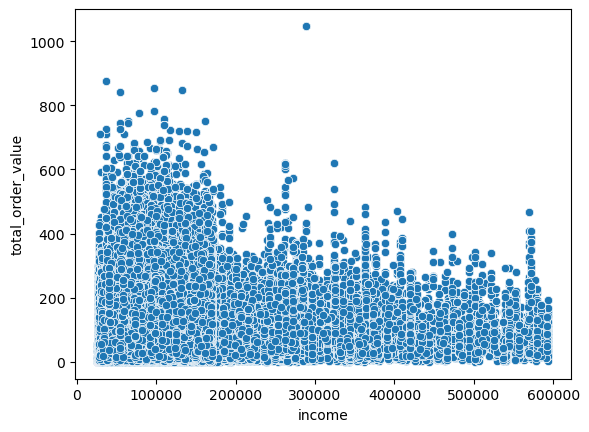

In [172]:
#Scatterplot to identify distribution of values
sns.scatterplot(x = 'income', y = 'total_order_value',data = df_1)

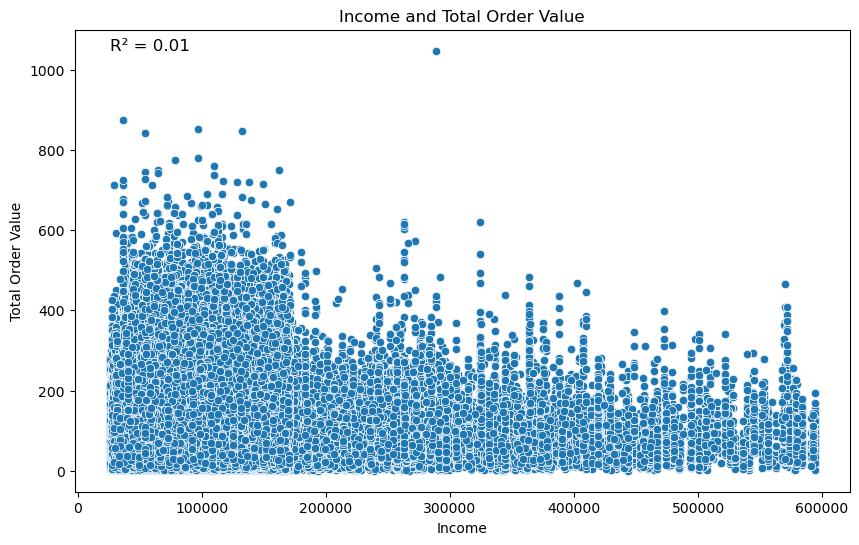

In [178]:
plt.figure(figsize=(10, 6))  # Set a suitable figure size for the plot

# Scatterplot to identify distribution of values, flipping X and Y axes
sns.scatterplot(x='income', y='total_order_value', data=df_1)

# Calculate the R² value
slope, intercept = np.polyfit(df_1['income'], df_1['total_order_value'], 1)
r_squared = np.corrcoef(df_1['income'], df_1['total_order_value'])[0, 1]**2

# Adding the R² value to the plot
plt.text(x=min(df_1['income']), y=max(df_1['total_order_value']), s=f'R² = {r_squared:.2f}', fontsize=12)

# Change legend of axes
plt.xlabel('Income')
plt.ylabel('Total Order Value')

# Set chart title
plt.title('Income and Total Order Value')

# Display the plot
plt.show()

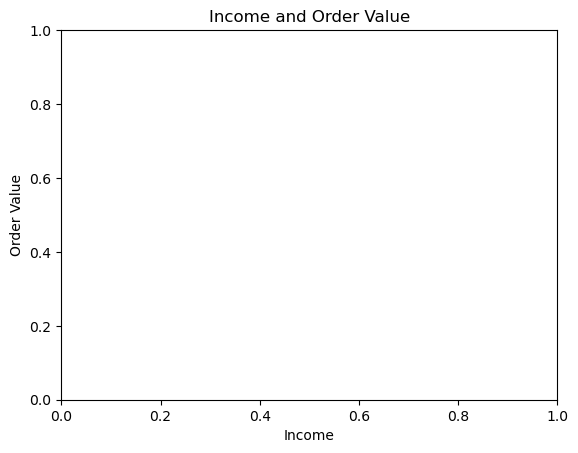

In [180]:
# Change legend of axes
plt.xlabel('Income')
plt.ylabel('Order Value')

# Set chart title
plt.title('Income and Order Value')

# Display the plot
plt.show()

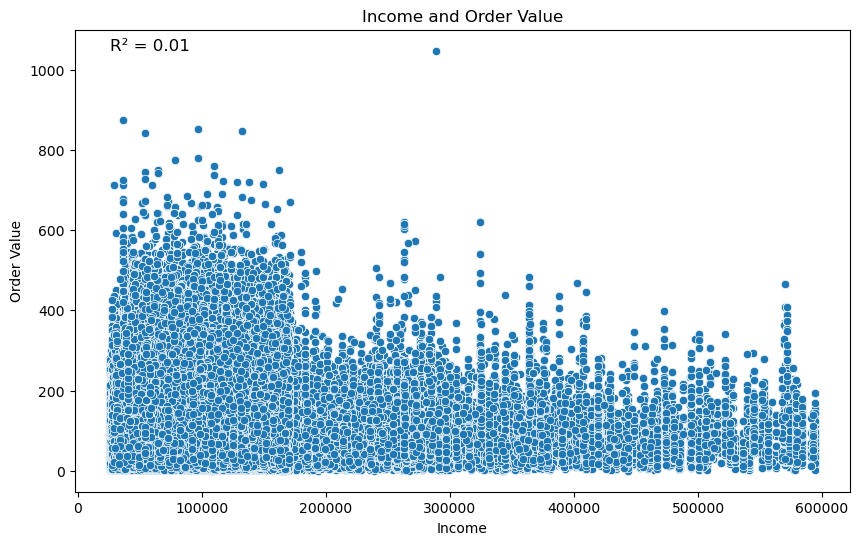

In [190]:
plt.figure(figsize=(10, 6))  # Set a suitable figure size for the plot

# Scatterplot to identify distribution of values, flipping X and Y axes
sns.scatterplot(x='income', y='total_order_value', data=df_1)

# Calculate the R² value
slope, intercept = np.polyfit(df_1['income'], df_1['total_order_value'], 1)
r_squared = np.corrcoef(df_1['income'], df_1['total_order_value'])[0, 1]**2

# Adding the R² value to the plot
plt.text(x=min(df_1['income']), y=max(df_1['total_order_value']), s=f'R² = {r_squared:.2f}', fontsize=12)

# Change legend of axes
plt.xlabel('Income')
plt.ylabel('Order Value')

# Set chart title
plt.title('Income and Order Value')

# Save the plot to the specified path
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_order_value.png'))

# Display the plot
plt.show()

Calculate average order value for each customer over their lifetime

In [193]:
# Calculate the average total_order_value for each user_id
avg_order_vol = df_order_values.groupby('user_id')['total_order_value'].mean().reset_index()

# Rename the column for clarity
avg_order_vol.columns = ['user_id', 'avg_total_order_value']

# Display the resulting DataFrame
avg_order_vol

,user_id,avg_total_order_value
0,1,46.086842
1,2,135.998093
2,3,66.555176
3,4,15.000000
4,7,80.015785
...,...,...
162626,206203,126.599998
162627,206206,48.060581
162628,206207,122.555351
162629,206208,135.947083


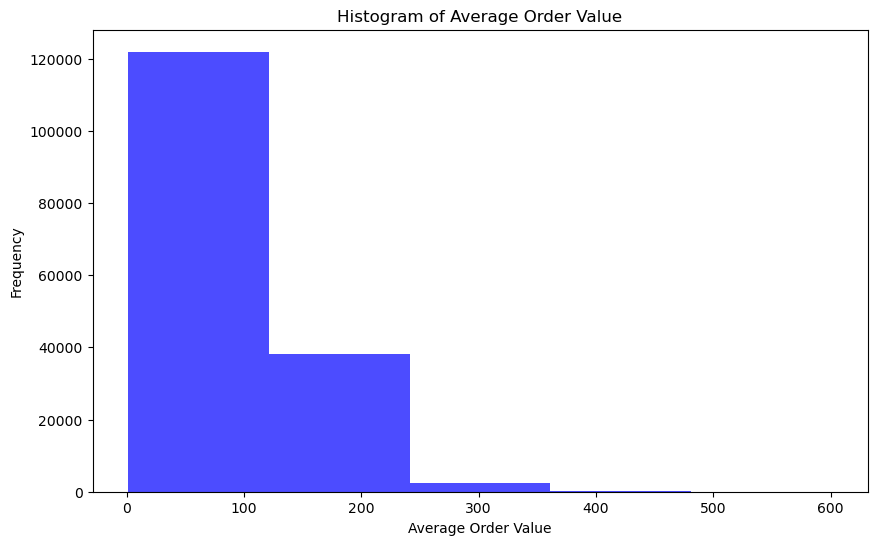

In [207]:
# Create the histogram of the avg_total_order_value column with 10 bins
plt.figure(figsize=(10, 6))  # Set the size of the figure
plt.hist(avg_order_vol['avg_total_order_value'], bins=5, color='blue', alpha=0.7)

# Adding titles and labels
plt.title('Histogram of Average Order Value')
plt.xlabel('Average Order Value')
plt.ylabel('Frequency')

# Save the plot to the specified path
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histogram_order_value.png'))

# Show the plot
plt.show()

In [209]:
# Merge avg_order_vol with df_order_values on 'user_id'
df_order_avg_values = df_order_values.merge(avg_order_vol, on='user_id', how='left')

In [211]:
# Ensure the avg_total_order_value is set to int16
df_order_avg_values['avg_total_order_value'] = df_order_avg_values['avg_total_order_value'].astype('int16')


In [213]:
df_order_avg_values.head()

,department,department_id,user_id,gender,state,age,dependants,fam_status,income,product_id,...,days_since_last_order,busiest_period_of_day,max_order,loyalty_flag,median_order,freq_cust,region,activity,total_order_value,avg_total_order_value
0,frozen,1,33890,Female,New Mexico,36,0,single,59285,21785,...,21.0,Regularly busy,12,Regular customer,26.0,Non-frequent customer,West,Active customer,49.599998,49
1,frozen,1,65803,Male,Idaho,35,2,married,99568,4428,...,3.0,Regularly busy,9,New customer,7.0,Frequent customer,West,Active customer,103.099998,103
2,frozen,1,65803,Male,Idaho,35,2,married,99568,12324,...,7.0,Regularly busy,9,New customer,7.0,Frequent customer,West,Active customer,95.199997,103
3,frozen,1,65803,Male,Idaho,35,2,married,99568,13031,...,7.0,Regularly busy,9,New customer,7.0,Frequent customer,West,Active customer,95.199997,103
4,frozen,1,65803,Male,Idaho,35,2,married,99568,48073,...,3.0,Regularly busy,9,New customer,7.0,Frequent customer,West,Active customer,103.099998,103


In [217]:
df_order_avg_values['avg_total_order_value'].describe()

count    2.441488e+07
mean     1.219125e+02
std      5.761342e+01
min      1.000000e+00
25%      8.100000e+01
50%      1.130000e+02
75%      1.530000e+02
max      6.010000e+02
Name: avg_total_order_value, dtype: float64

In [219]:
df_order_avg_values.loc[df_order_avg_values['avg_total_order_value'] <= 81, 'cust_value'] = 'Lowest value'
df_order_avg_values.loc[(df_order_avg_values['avg_total_order_value'] > 81) & (df_order_avg_values['avg_total_order_value'] <113), 'cust_value'] = 'Low value' 
df_order_avg_values.loc[(df_order_avg_values['avg_total_order_value'] >= 113) & (df_order_avg_values['avg_total_order_value'] <153), 'cust_value'] = 'High value' 
df_order_avg_values.loc[df_order_avg_values['avg_total_order_value'] >= 153, 'cust_value'] = 'Highest value'

In [221]:
#Creating frequency table for cust_value
df_order_avg_values['cust_value'].value_counts(dropna = False)

cust_value
Lowest value     6205217
Highest value    6201842
High value       6128516
Low value        5879302
Name: count, dtype: int64

In [223]:
#Looking at cust_value across regions
crosstab = pd.crosstab(df_order_avg_values['cust_value'], df_order_avg_values['region'])

In [225]:
crosstab

region,Midwest,Northeast,South,West
cust_value,,,,
High value,1422374,1105552,2003959,1596631
Highest value,1440246,1095928,2094816,1570852
Low value,1380634,1035665,1935205,1527798
Lowest value,1468502,1078126,2095106,1563483


<Figure size 1200x800 with 0 Axes>

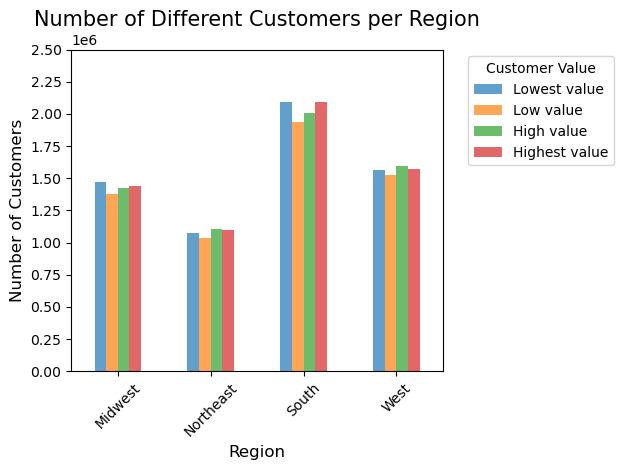

In [247]:
# Group by region and cust_value and count occurrences
cust_value_counts = df_order_avg_values.groupby(['region', 'cust_value']).size().unstack(fill_value=0)

# Define the custom sort order
sort_order = ["Lowest value", "Low value", "High value", "Highest value"]

# Reindex the DataFrame according to the custom sort order, filling missing columns with 0
sorted_cust_value_counts = cust_value_counts.reindex(columns=sort_order, fill_value=0)

# Create the bar chart
plt.figure(figsize=(12, 8))  # Set the size of the figure

# Plotting the bars (grouped bar chart)
ax = sorted_cust_value_counts.plot(kind='bar', alpha=0.7)

# Adding titles and labels
plt.title('Number of Different Customers per Region', fontsize=15)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Move the legend to the right of the chart
plt.legend(title='Customer Value', bbox_to_anchor=(1.05, 1), loc='upper left')

# Setting Y-axis limits and increments
ax.set_yticks(range(0, int(sorted_cust_value_counts.values.max()) + 500000, 250000))  # Adjusting the Y-axis ticks

# Export the chart to the specified path
export_path = os.path.join(path, '04 Analysis', 'Visualizations', 'bar_cust_value_region.png')  # Adjust the path as needed
plt.savefig(export_path, bbox_inches='tight')  # Save the chart

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

<Figure size 1200x800 with 0 Axes>

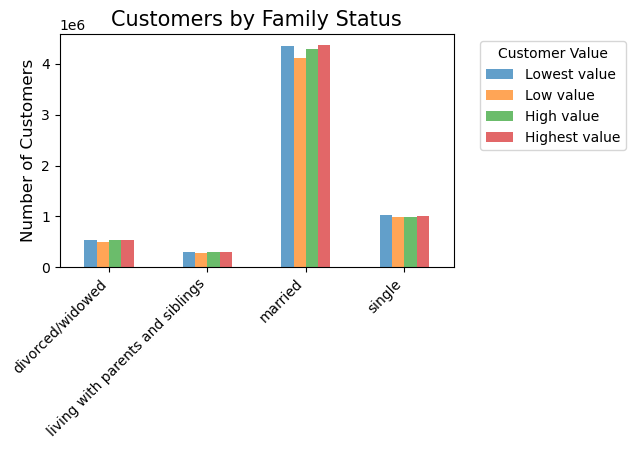

In [261]:
# Group by fam_status and cust_value and count occurrences
cust_value_counts = df_order_avg_values.groupby(['fam_status', 'cust_value']).size().unstack(fill_value=0)

# Define the custom sort order
sort_order = ["Lowest value", "Low value", "High value", "Highest value"]

# Reindex the DataFrame according to the custom sort order, filling missing columns with 0
sorted_cust_value_counts = cust_value_counts.reindex(columns=sort_order, fill_value=0)

# Create the bar chart
plt.figure(figsize=(12, 8))  # Set the size of the figure

# Plotting the bars (grouped bar chart)
ax = sorted_cust_value_counts.plot(kind='bar', alpha=0.7)

# Adding titles and labels
plt.title('Customers by Family Status', fontsize=15)
plt.xlabel(' ', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Move the legend to the right of the chart
plt.legend(title='Customer Value', bbox_to_anchor=(1.05, 1), loc='upper left')

# Wrap the x-axis labels by setting rotation and horizontal alignment
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility

# Set tight layout for better spacing
plt.tight_layout()  # Adjust layout to make room for labels

# Export the chart to the specified path
export_path = os.path.join(path, '04 Analysis', 'Visualizations', 'var_cust_value_fam_status.png')  # Adjust the path as needed
plt.savefig(export_path, bbox_inches='tight')  # Save the chart

# Show the plot
plt.show()

C:\Users\No-Admin\AppData\Local\Temp\ipykernel_22300\2376453726.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cust_value_counts_by_age = df_order_avg_values.groupby(['age_group', 'cust_value']).size().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

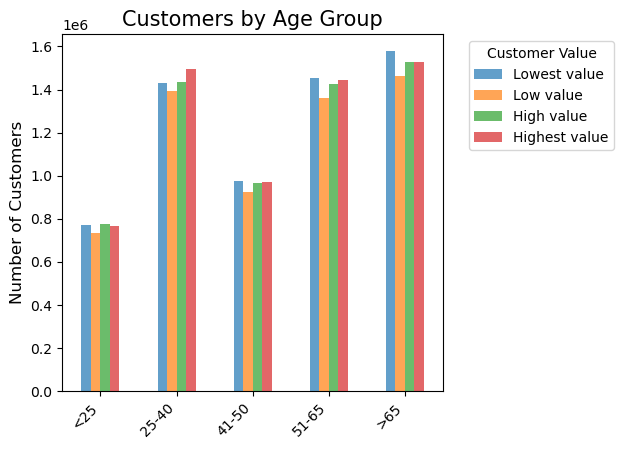

In [263]:
# Define age bins and labels
bins = [-float('inf'), 25, 40, 50, 65, float('inf')]  # Define bins for age ranges
labels = ['<25', '25-40', '41-50', '51-65', '>65']  # Define labels for those bins

# Create a new column for age category
df_order_avg_values['age_group'] = pd.cut(df_order_avg_values['age'], bins=bins, labels=labels)

# Group by age_group and cust_value and count occurrences
cust_value_counts_by_age = df_order_avg_values.groupby(['age_group', 'cust_value']).size().unstack(fill_value=0)

# Define the custom sort order
sort_order = ["Lowest value", "Low value", "High value", "Highest value"]

# Reindex the DataFrame according to the custom sort order, filling missing columns with 0
sorted_cust_value_counts_by_age = cust_value_counts_by_age.reindex(columns=sort_order, fill_value=0)

# Create the bar chart
plt.figure(figsize=(12, 8))  # Set the size of the figure

# Plotting the bars (grouped bar chart)
ax = sorted_cust_value_counts_by_age.plot(kind='bar', alpha=0.7)

# Adding titles and labels
plt.title('Customers by Age Group', fontsize=15)
plt.xlabel(' ', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Move the legend to the right of the chart
plt.legend(title='Customer Value', bbox_to_anchor=(1.05, 1), loc='upper left')

# Wrap the x-axis labels by setting rotation and horizontal alignment
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility

# Set tight layout for better spacing
plt.tight_layout()  # Adjust layout to make room for labels

# Export the chart to the specified path
export_path = os.path.join(path, '04 Analysis', 'Visualizations', 'bar_cust_value_age.png')  # Adjust the path as needed
plt.savefig(export_path, bbox_inches='tight')  # Save the chart

# Show the plot
plt.show()

In [265]:
df_order_avg_values.columns

Index(['department', 'department_id', 'user_id', 'gender', 'state', 'age',
       'dependants', 'fam_status', 'income', 'product_id', 'product_name',
       'prices', 'order_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'median_order', 'freq_cust', 'region',
       'activity', 'total_order_value', 'avg_total_order_value', 'cust_value',
       'age_group'],
      dtype='object')

## 05. Exporting data

In [268]:
#Export Data as Pickle
df_order_avg_values.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'X_order_avg_values.pkl'))